# Analisis exploratorio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('risk_factors_cervical_cancer.csv')
data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Al realizar un primer análisis de las variables podemos notar 36 columnas, en estas los valores nulos estan codificados como “?”. Para limpiar estos datos vamos a convertir todos los “?” en NaN y vamos a convertir todas las columnas numéricas a floats. 

In [2]:
data = data.replace('?', np.nan)

for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

### Vamos a analizar las variables cualitativas
Las variables identificadas como cualitativas son: Age, Number of sexual partners, First sexual intercourse, Num of pregnancies, Smokes (years), Smokes (packs/year), Hormonal Contraceptives (years)

A continuacion se muestra un resumen de estas variables:

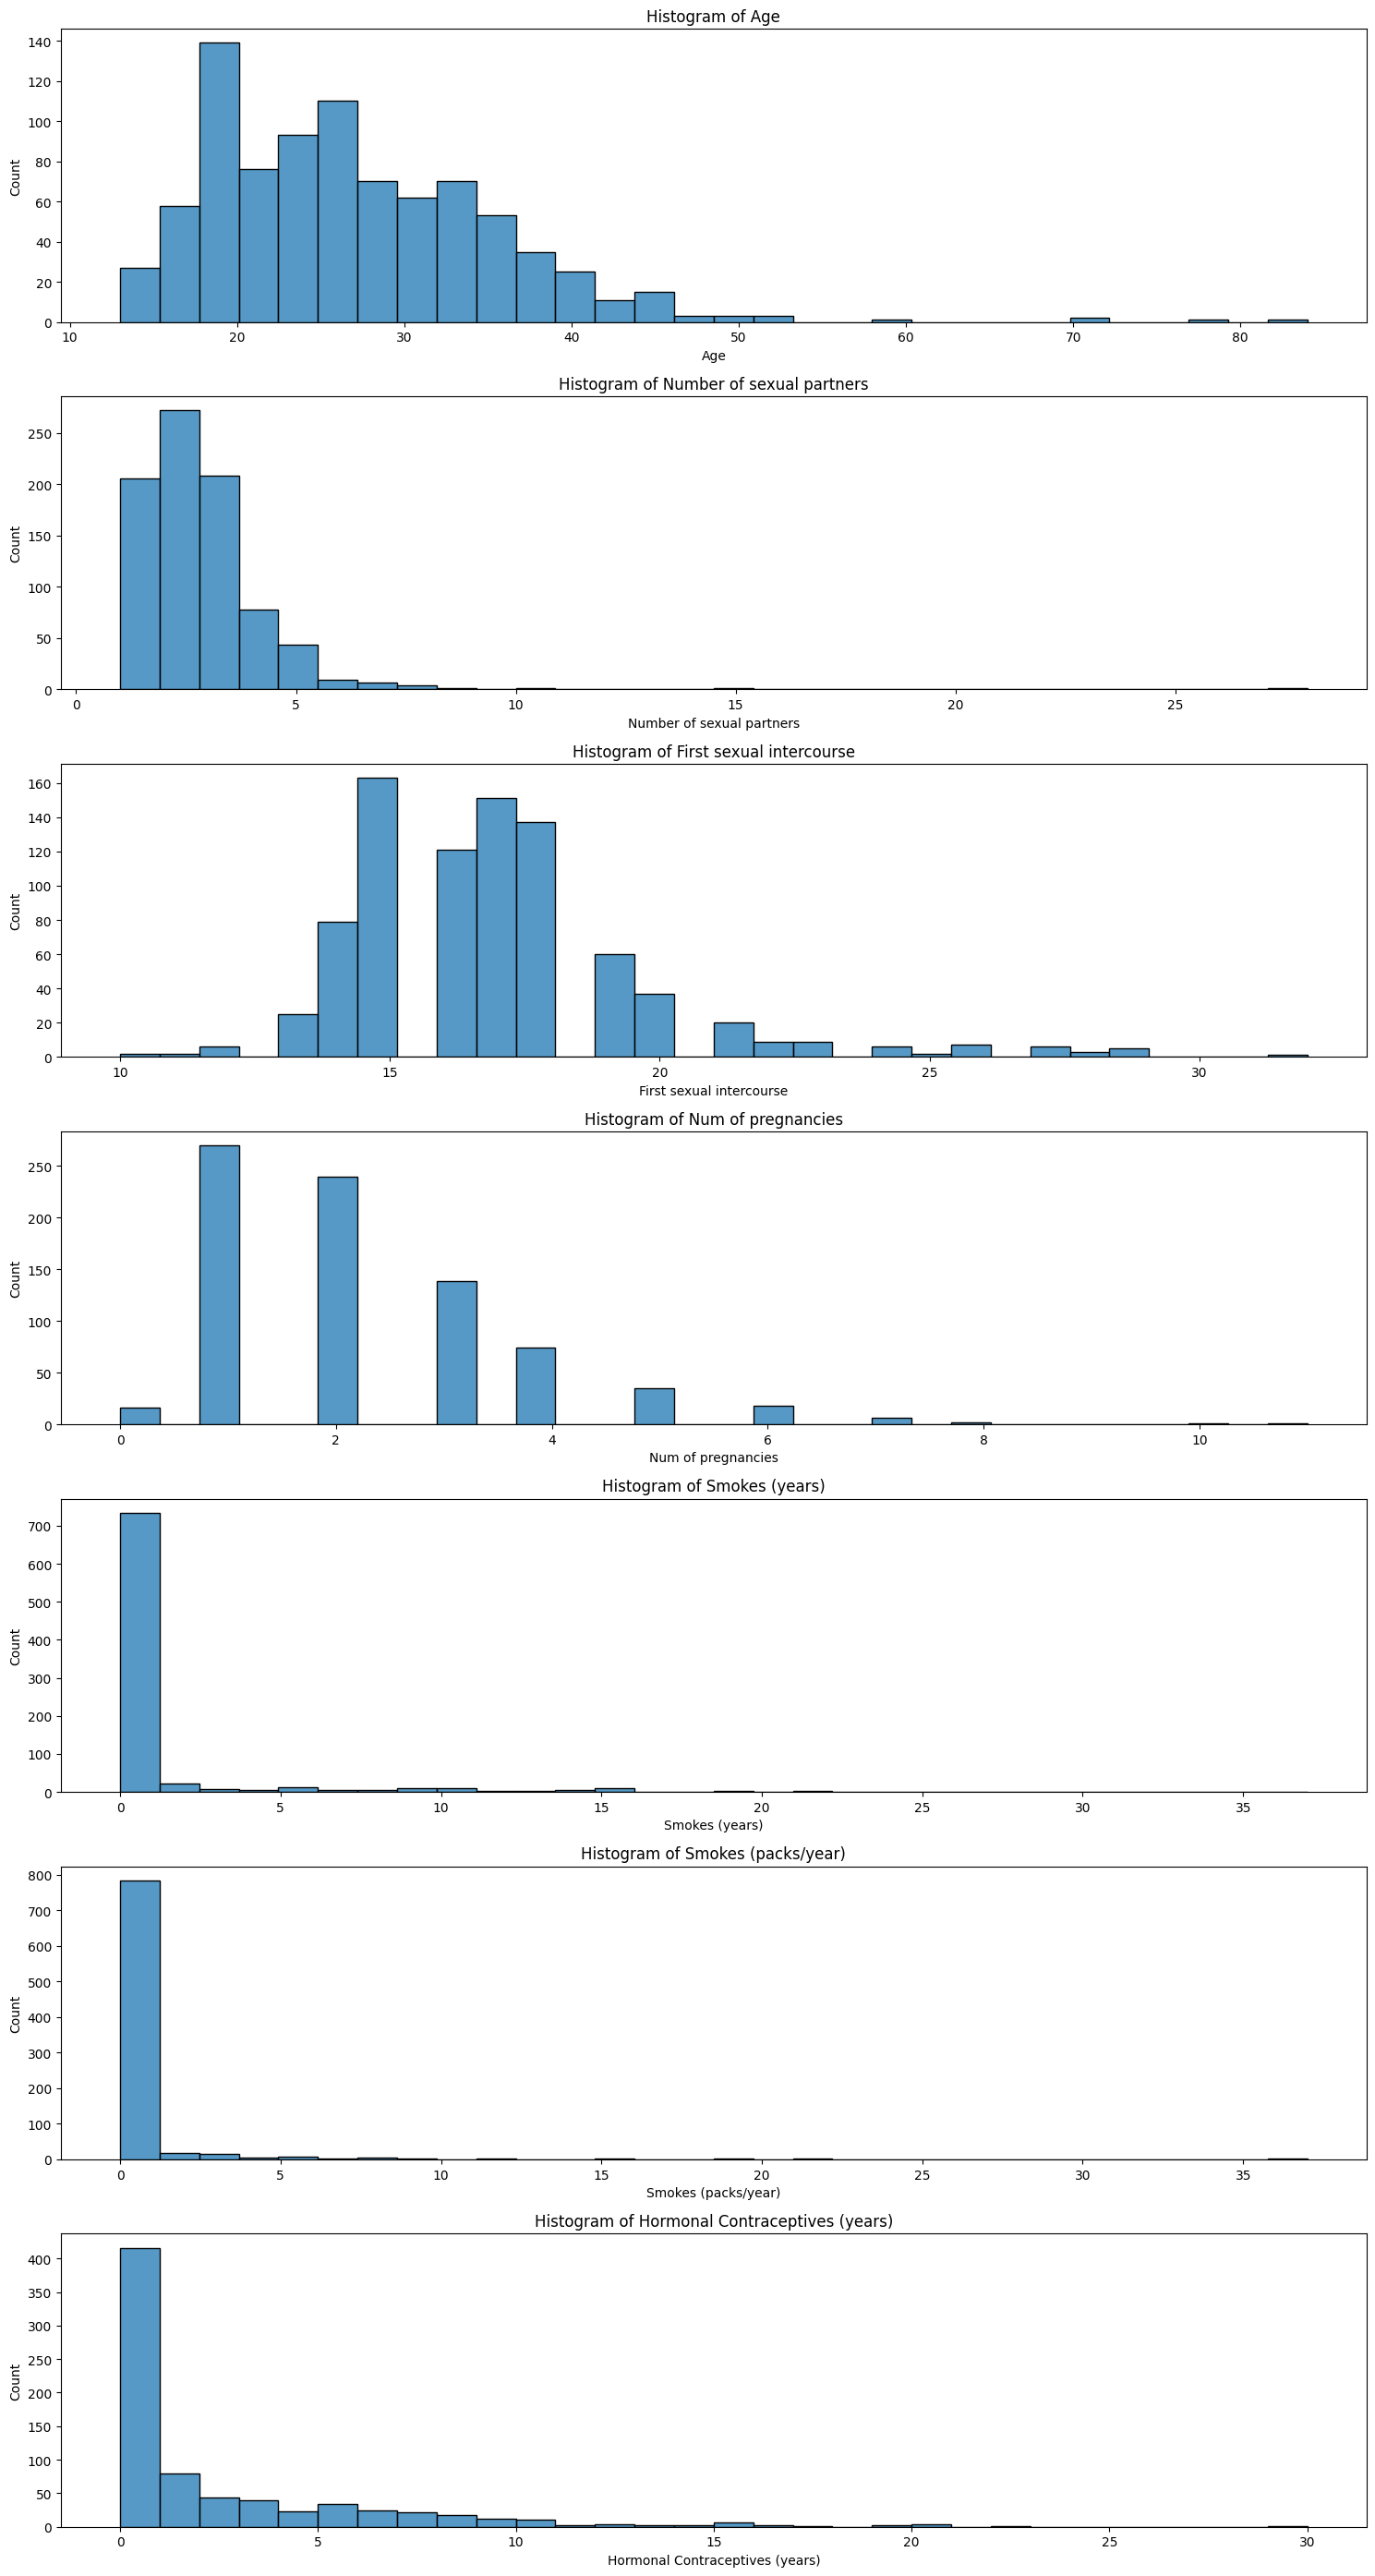

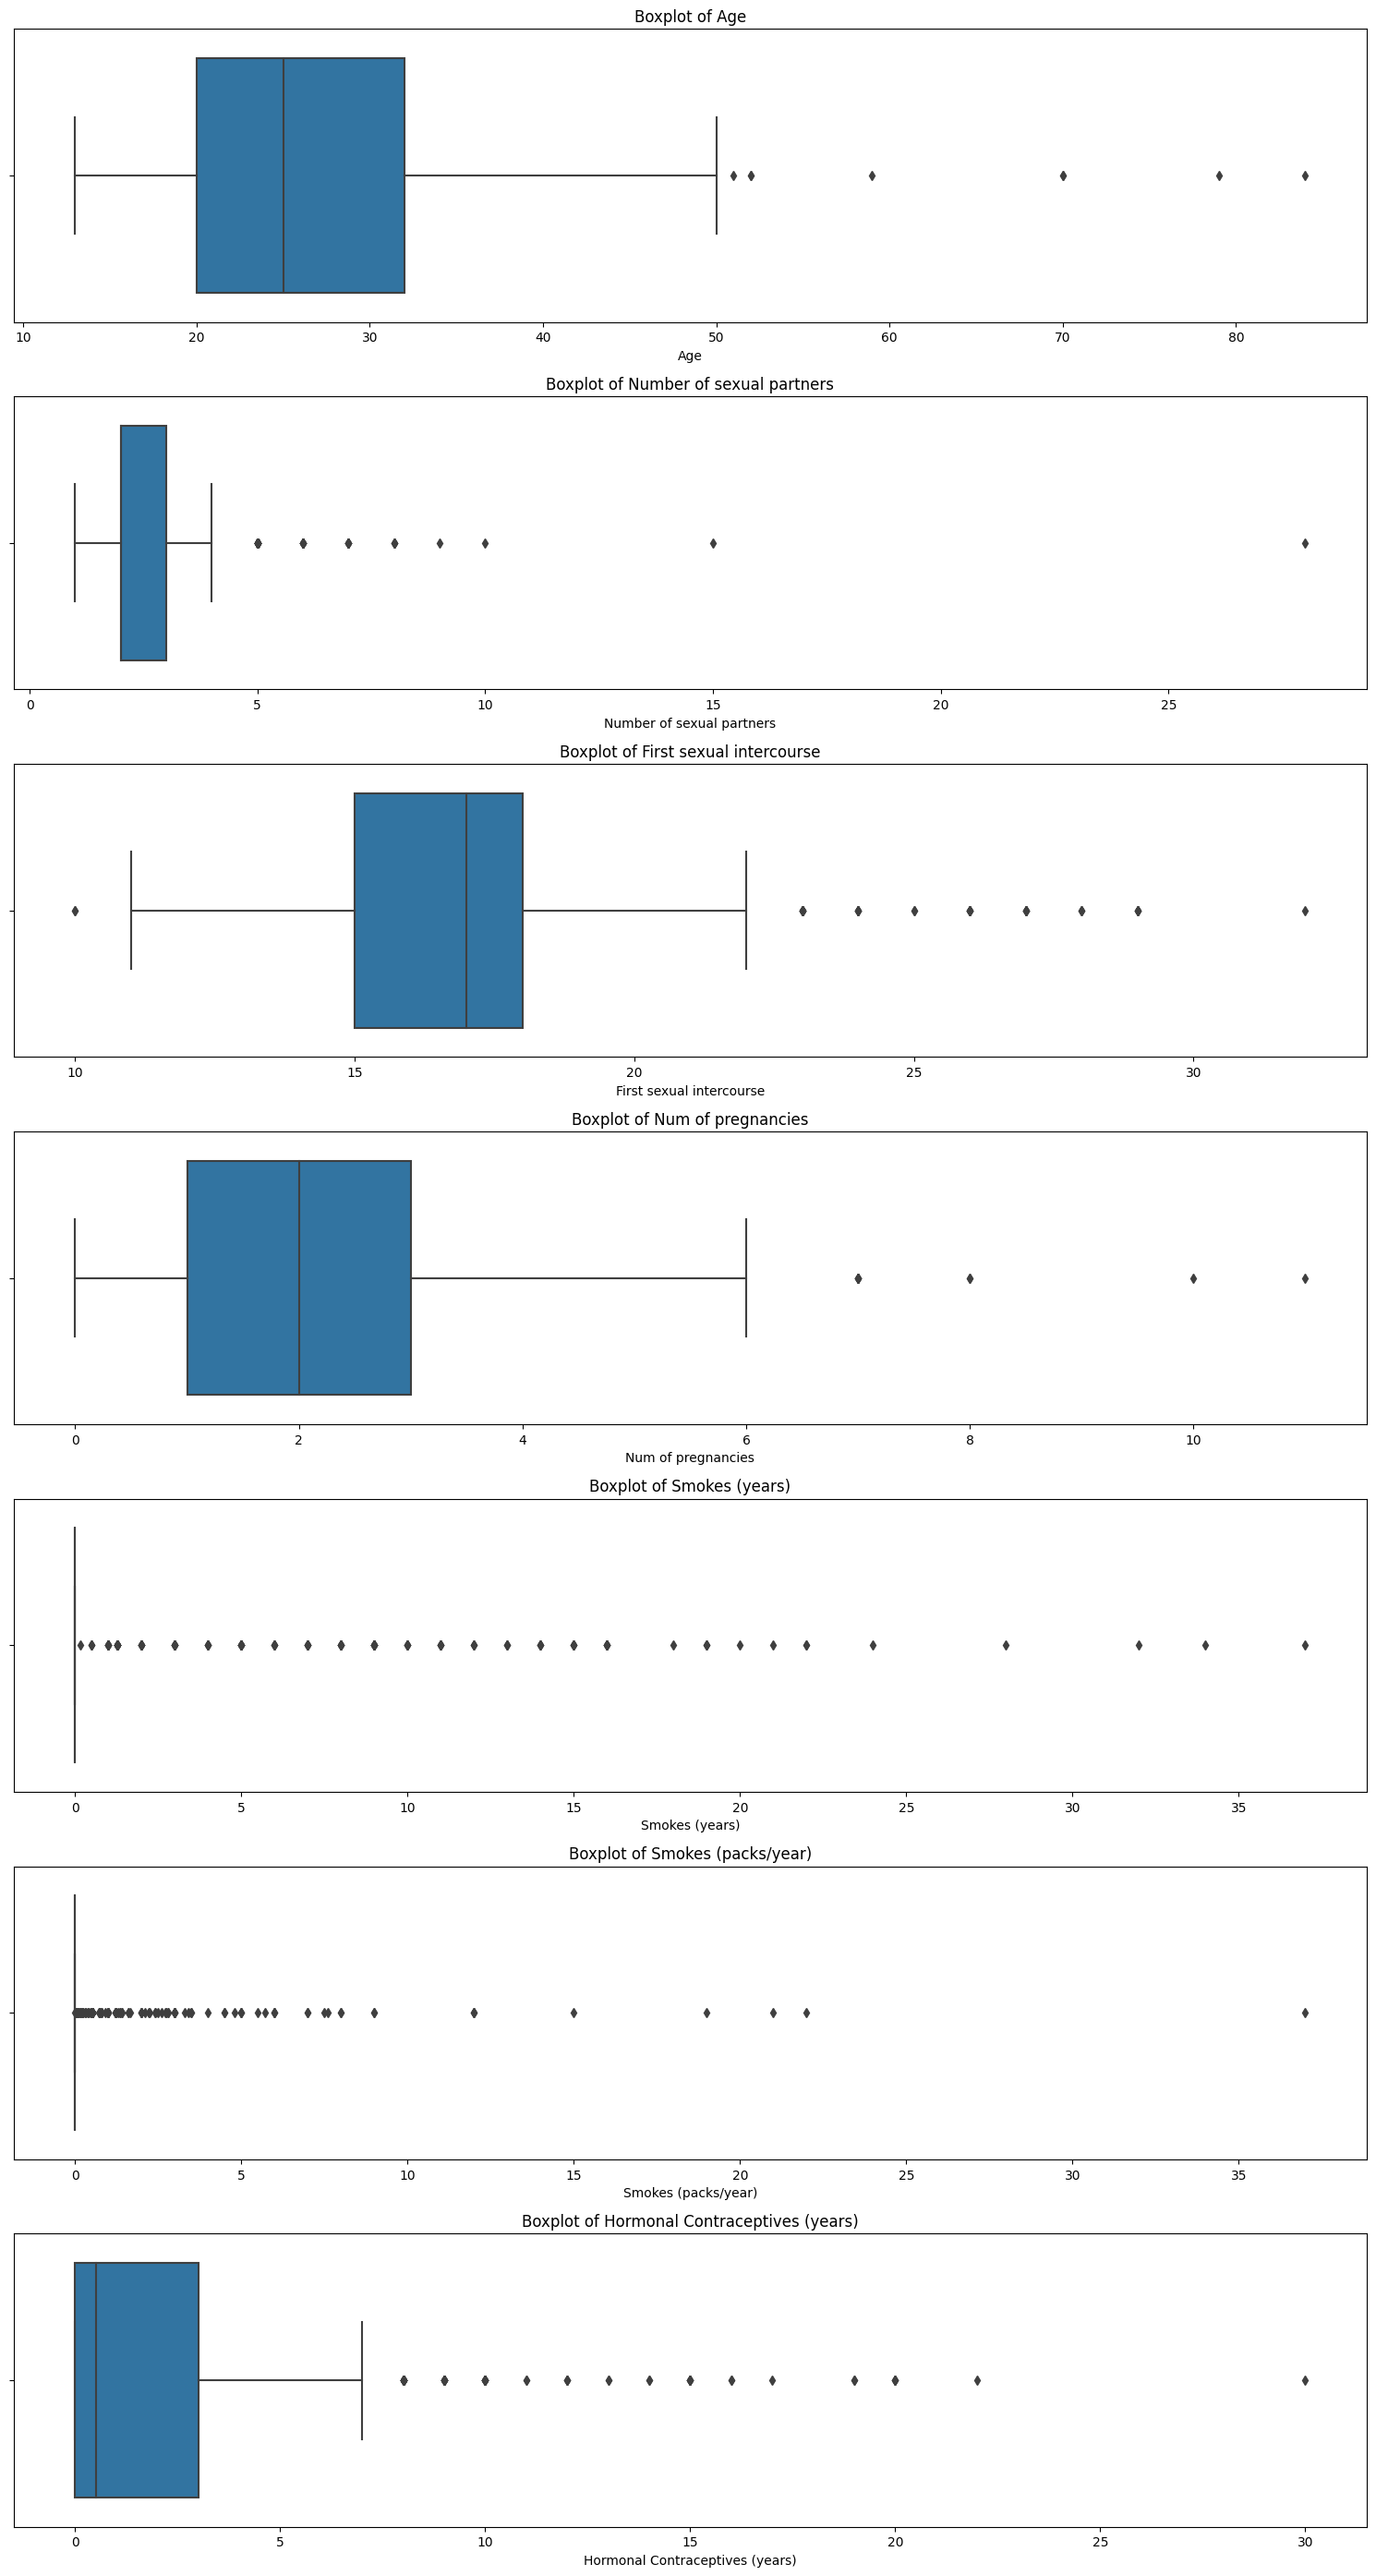

In [9]:
variables = ['Age', 'Number of sexual partners', 'First sexual intercourse', 
             'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 
             'Hormonal Contraceptives (years)']

fig, axes = plt.subplots(len(variables), 1, figsize=(15, 4 * len(variables)))

for var, ax in zip(variables, axes):
    sns.histplot(data[var], kde=False, ax=ax, bins=30)
    ax.set_title('Histogram of ' + var)

plt.tight_layout()
   
fig, axes = plt.subplots(len(variables), 1, figsize=(15, 4 * len(variables))) 
for var, ax in zip(variables, axes):
    sns.boxplot(x=data[var], ax=ax)
    ax.set_title('Boxplot of ' + var)

plt.tight_layout()
plt.show()


Entre observaciones interesantes podemos observar que la tabla de "First sexual intercourse" tenemos *gaps* importantes. Smokes es extremadamente sesgada a la derecha, por lo que pocas personas fuman. Por otro lado, la variable de *Number of sexual partners* notamos un valor atipico al extremo superior de la distribucion extremadamente alto.

### Vamos a analizar las variables categoricas

Para analizar mas facilmente vamos a tomar las variables categoricas como las que tienen menos de 10 valores diferentes.

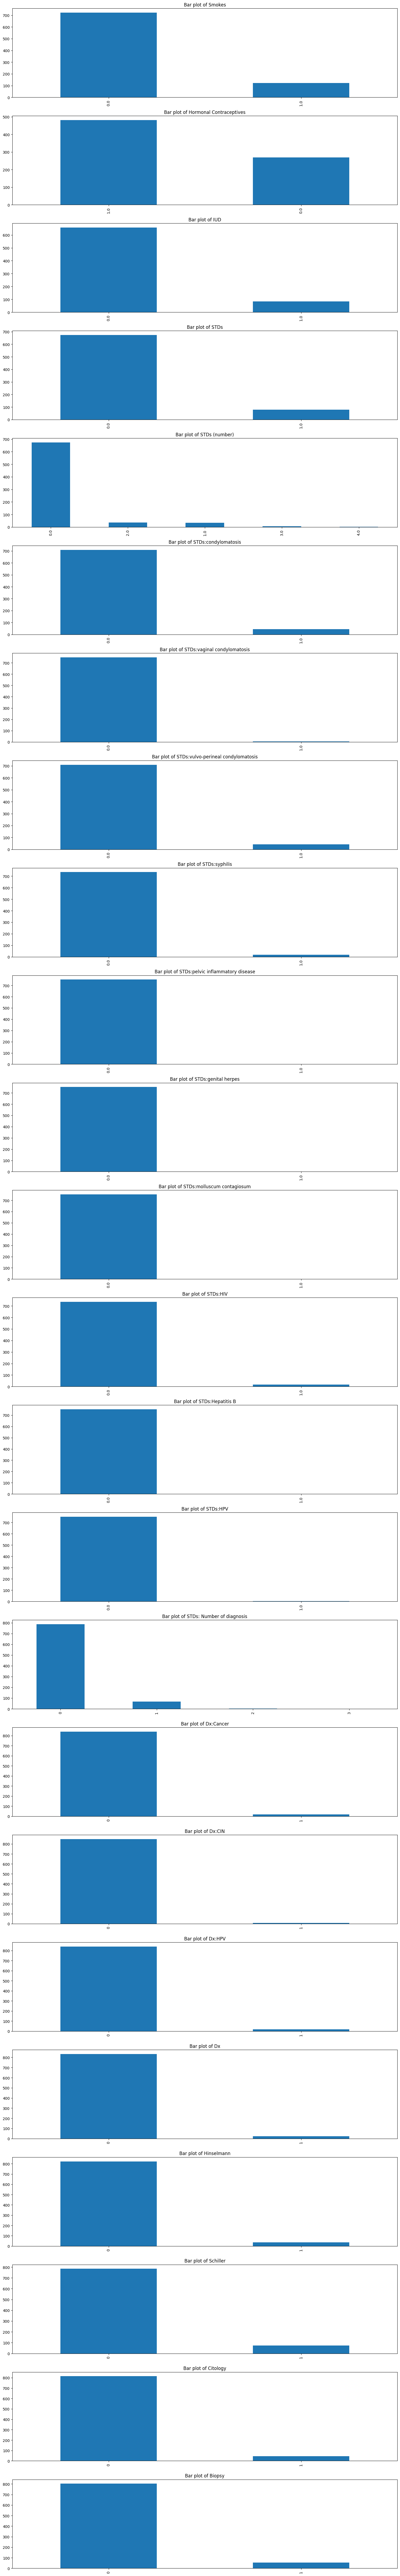

In [10]:
categorical_variables = data.nunique()[data.nunique() < 10].keys().tolist()
num_unique_values = data[categorical_variables].nunique()
categorical_variables = [var for var in categorical_variables if num_unique_values[var] > 1]

fig, axes = plt.subplots(len(categorical_variables), 1, figsize=(15, 4 * len(categorical_variables)))

for var, ax in zip(categorical_variables, axes):

    data[var].value_counts().plot(kind='bar', ax=ax)
    ax.set_title('Bar plot of ' + var)


plt.tight_layout()
plt.show()




Se nota que en el caso de las enfermedades hay una predominancia por la clase 0, es decir, que no tienen enfermedades. Por otro lado, en el caso de los anticonceptivos hormonales, se nota que la clase 0 es la que no usa anticonceptivos, mientras que la clase 1 es la que si usa anticonceptivos notandolo que hay una predominancia del uso de anticonceptivos.

### Datos faltantes y nulos

<AxesSubplot:>

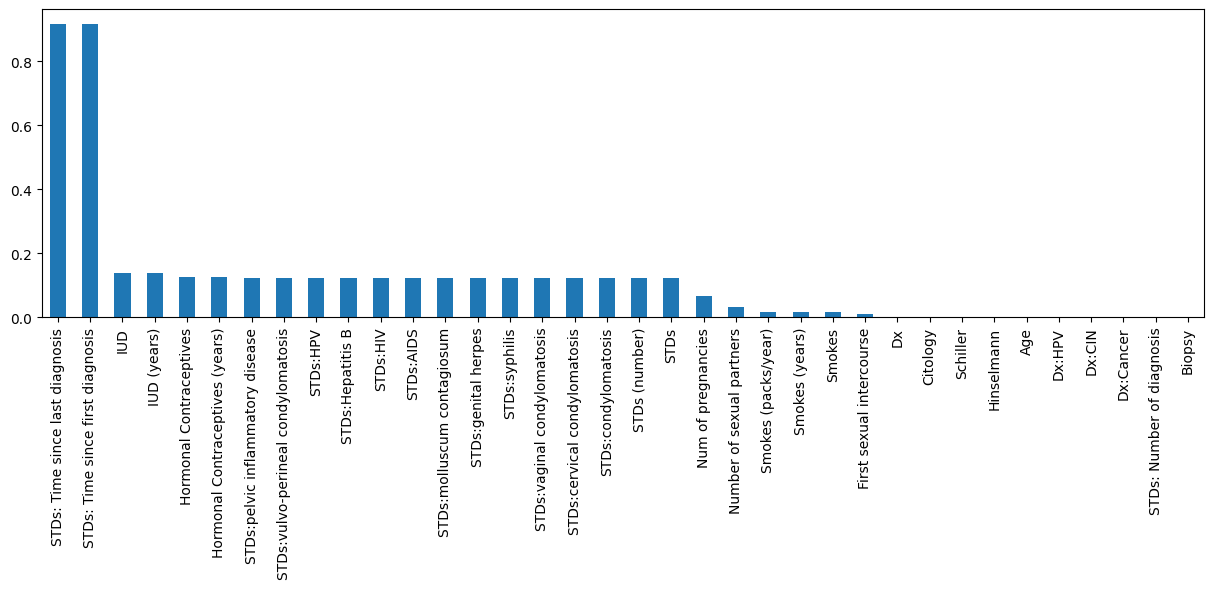

In [12]:
missing_proportions = data.isnull().mean()
missing_proportions.sort_values(ascending=False).plot(kind='bar', figsize=(15, 4))

Al ver esto notamos que STDs: Time since first diagnosis y STDs: Time since last diagnosis tienen muchos valores nulos, por lo que vamos a eliminar estas columnas. Por otro lado, vamos a modificar las filas que tengan valores nulos en las columnas que no sean las mencionadas anteriormente y las variables de STDs:cervical condylomatosis y STDs:AIDS ya que no tienen datos utiles.

In [13]:
data = data.loc[:, missing_proportions <= 0.6]

for var in ['STDs:cervical condylomatosis', 'STDs:AIDS']:
    if var in data.columns:
        data = data.drop(columns=var)
        
for var in data.columns:
    data[var] = data[var].fillna(data[var].median())


Age                                   0.0
Number of sexual partners             0.0
Citology                              0.0
Schiller                              0.0
Hinselmann                            0.0
Dx                                    0.0
Dx:HPV                                0.0
Dx:CIN                                0.0
Dx:Cancer                             0.0
STDs: Number of diagnosis             0.0
STDs:HPV                              0.0
STDs:Hepatitis B                      0.0
STDs:HIV                              0.0
STDs:molluscum contagiosum            0.0
STDs:genital herpes                   0.0
STDs:pelvic inflammatory disease      0.0
STDs:syphilis                         0.0
STDs:vulvo-perineal condylomatosis    0.0
STDs:vaginal condylomatosis           0.0
STDs:condylomatosis                   0.0
STDs (number)                         0.0
STDs                                  0.0
IUD (years)                           0.0
IUD                               

# Analisis de componentes principales

### Matriz de correlacion

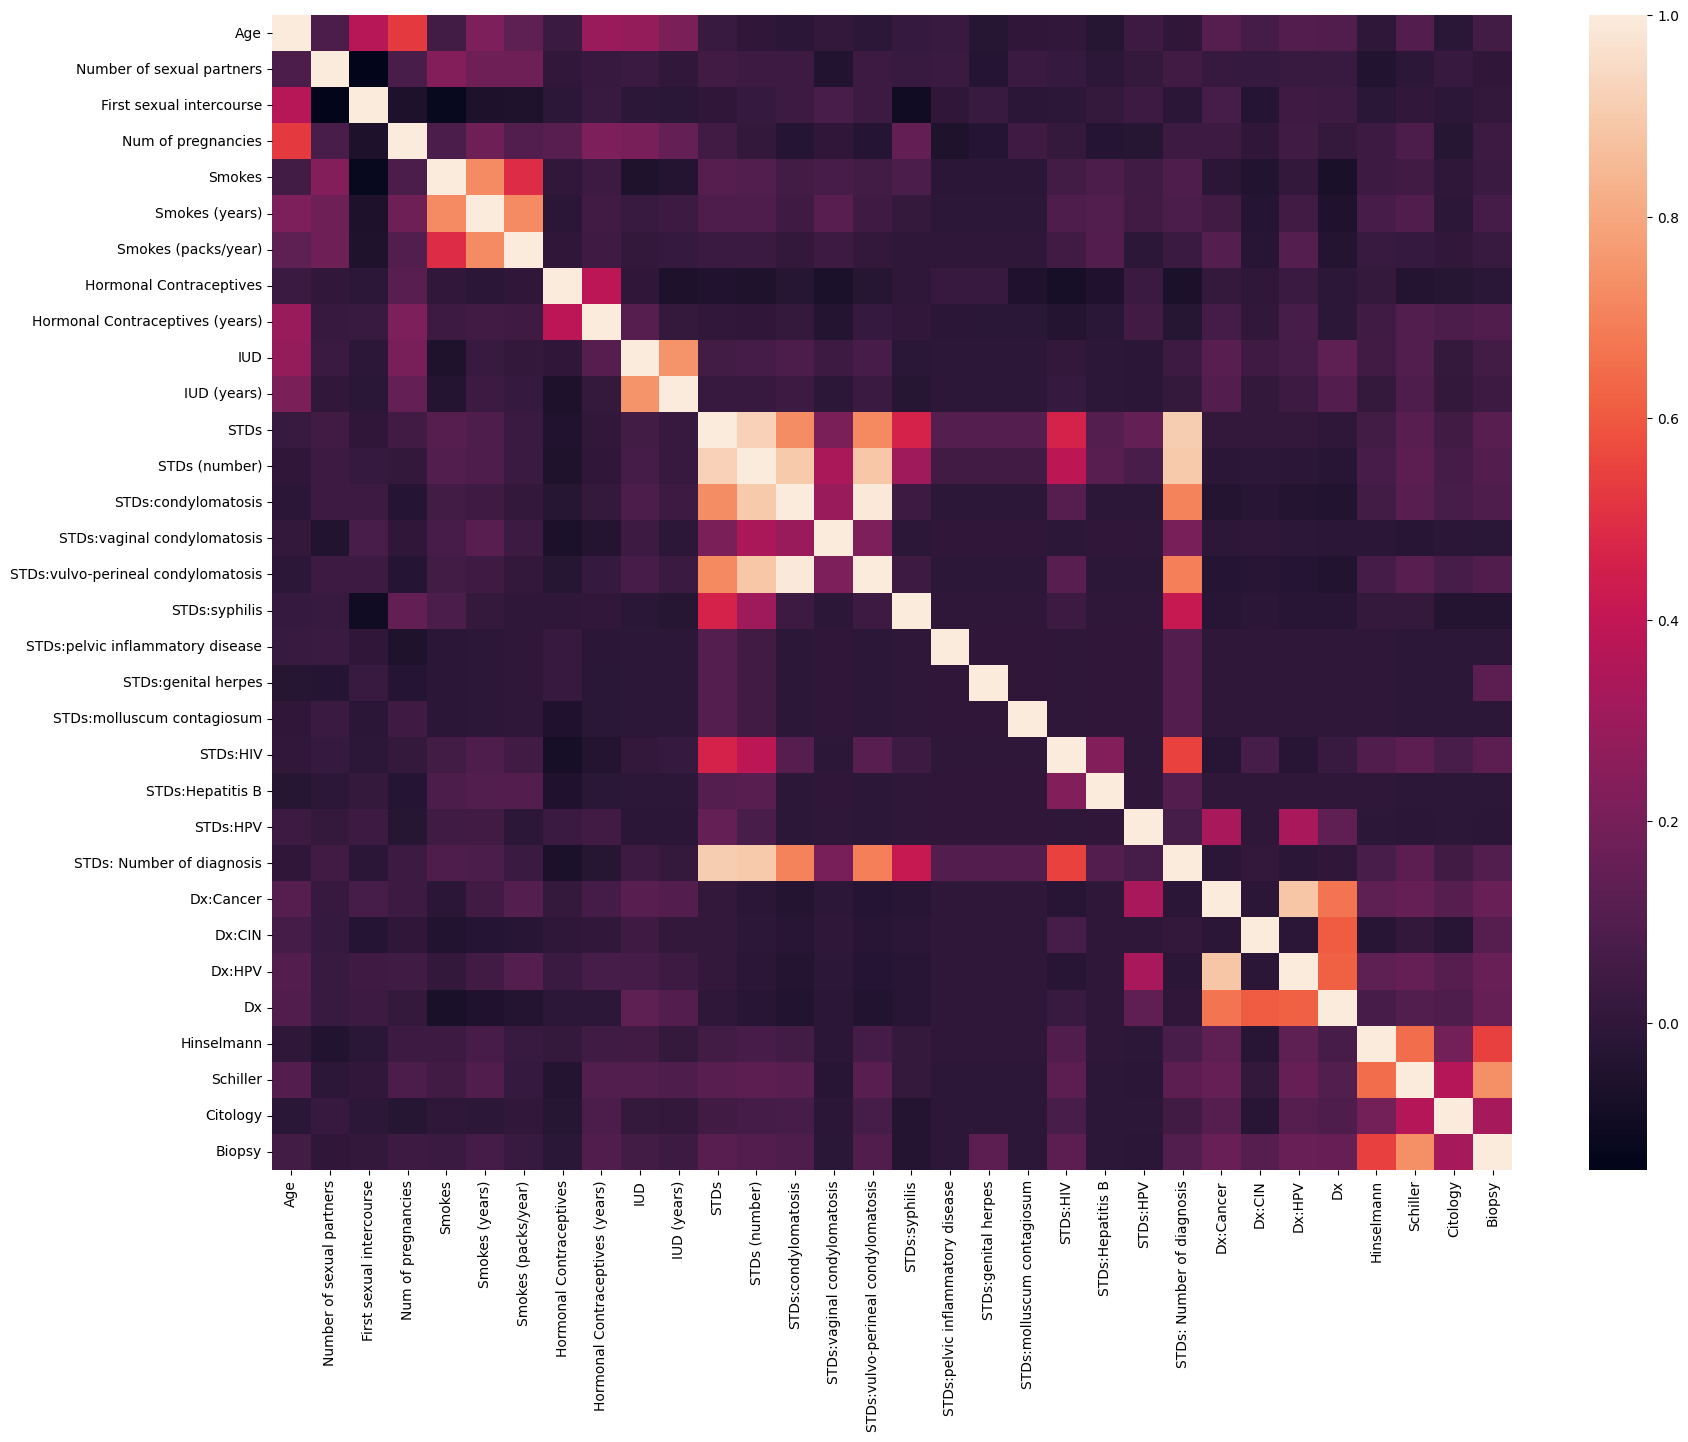

In [37]:
corr_matrix = data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix)
plt.show()

Se puede observar que las variabels de Smokes, Smoke Years y Smoke Packsa estan correlacionadas entre si, ya que tiene sentido y relacionado con el acto de FUmar. Asimismo Contraceptives por la misma manera. 

Asimismo Dx:Cancer, Dx:CIN, Dx:HPV, Dx, Hineselman, Schiller, Citology, Biopsy estan correlacionadas entre si, ya que son enfermedades y diagnostico relacionadas con el cancer.

### Prueba de esfericidad de Bartlett

In [48]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer

chi_square_value, p_value = calculate_bartlett_sphericity(data)
chi_square_value, p_value

c:\Users\josem\AppData\Local\Programs\Python\Python310\lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(nan, nan)

### Mayor variabilidad posible

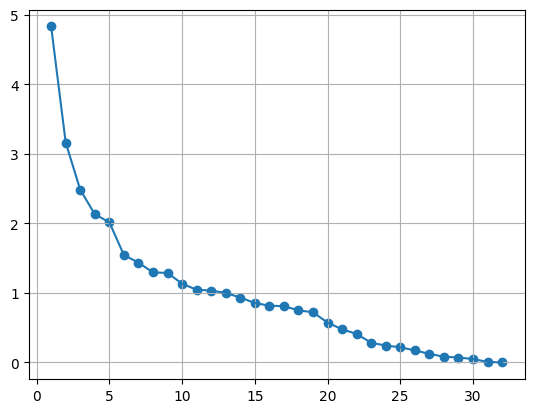

13

In [50]:
fa = FactorAnalyzer(rotation=None)

fa.fit(data)
eigen_values, _ = fa.get_eigenvalues()

plt.scatter(range(1, data.shape[1] + 1), eigen_values)
plt.plot(range(1, data.shape[1] + 1), eigen_values)
plt.grid()
plt.show()

In [51]:
fa = FactorAnalyzer(n_factors=13, rotation="varimax")
fa.fit(data)

loadings = fa.loadings_
loadings_df = pd.DataFrame(loadings, index=data.columns)
loadings_df


,0,1,2,3,4,5,6,7,8,9,10,11,12
Age,0.001230,0.060550,0.010197,0.124148,0.160309,-0.028275,0.916759,0.058779,-0.030924,0.043513,0.075102,0.328689,-0.014128
Number of sexual partners,0.036054,0.025341,-0.022547,0.214054,-0.001574,-0.001614,0.116323,0.025499,-0.005583,0.033103,-0.003443,-0.211906,-0.008958
First sexual intercourse,0.054532,0.060167,-0.020356,-0.086646,-0.031727,0.020527,0.139764,-0.011233,-0.065598,0.010885,-0.010560,0.735792,0.002118
Num of pregnancies,-0.021406,0.006663,0.032470,0.105714,0.131162,-0.022313,0.561600,-0.008522,0.105000,-0.046796,0.150669,-0.122476,-0.008081
Smokes,0.065351,-0.012916,0.019351,0.722558,-0.052446,0.047544,0.016229,-0.026945,0.047614,-0.012162,0.020455,-0.104144,0.007160
Smokes (years),0.049016,0.016107,0.047578,0.988570,0.033756,0.083668,0.093946,-0.014547,-0.008155,-0.008525,0.002369,0.025830,-0.006171
Smokes (packs/year),0.006172,0.069458,0.003798,0.707141,0.012857,0.069608,0.045978,-0.022119,-0.021371,-0.003005,0.010941,-0.013943,-0.047753
Hormonal Contraceptives,-0.042401,0.024603,-0.029145,-0.008068,-0.030983,-0.046657,-0.009975,0.002322,0.009145,0.017408,0.739744,-0.012019,-0.019403
Hormonal Contraceptives (years),-0.002235,0.041669,0.087687,0.031002,0.029795,-0.041549,0.253352,-0.015409,-0.015364,-0.011385,0.527158,0.005520,-0.014454
IUD,0.057195,0.033849,0.041483,-0.017640,0.887116,-0.015363,0.150120,0.042024,-0.014002,-0.004706,0.051784,-0.015373,-0.019779


En la primera columna las varibales que cuentan con la carga mas alta son las STDs, number y condylomatosis por lo que el primer componente esta captando enfermedades de transmision sexual. 

En la segunda tenemos la parte de Dx:Cancer, Dx:HPV y Dx por o que el componente captura diagnosticos de cancer.

En la tercera estan HInselmann, Schiller y Biopsy por lo que el componente captura resultados de pruebas. 

El componente 4 captura todo lo relacionado con fumar, Smokes, Smokes (years) y Smokes (packs/year).

El componente 5 habla sobre el dispositivo intra uterino, IUD (years) y IUD.